In [1]:
# Tom
# Package Imports

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import plot_confusion_matrix, recall_score, accuracy_score, precision_score, f1_score, classification_report
from sklearn.dummy import DummyRegressor, DummyClassifier

#New imports for our Pipeline workflows
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

#New imports from imblearn
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImPipeline





In [2]:
df = pd.read_csv('../data/original_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

State, phone number, intl plan, voice mail plan are objects -- need to encode

Account Length - maybe days, how long customer has been with company

6 - 18 Usage Stats = number of calls number of minutes and charge for different time categories.

19 - # of customer service calls

Possible Churn Indicators:

- By State?
- High Customer Service Contact = high churn?
- Low Calls/Low minutes = higher churn?
- Can we identify a customer profile that is likely to churn for targeted marketing/incentives?
- Drop Phone number -- basically a unique identifer for every customer, not likely to help in predictions

- Location
    - State/Area Code
    
- Duration
    - Account Length
    
- Plan Types
    - Intl / Voicemail
    
- Usage Stats
    - minutes
    - num calls
    - charges
    - customer service calls

Drop Phone number

Encoding Process:
    - voicemail plan = labelencoder 1/0
    - international plan = 1/0
    - state - onehot encoding

Scale Numerical Features





In [4]:
# Drop phone number from the data set--in this context, it acts as a unique identifier with little meaningful context.
df.drop('phone number', axis=1, inplace=True)

Churn rate by state

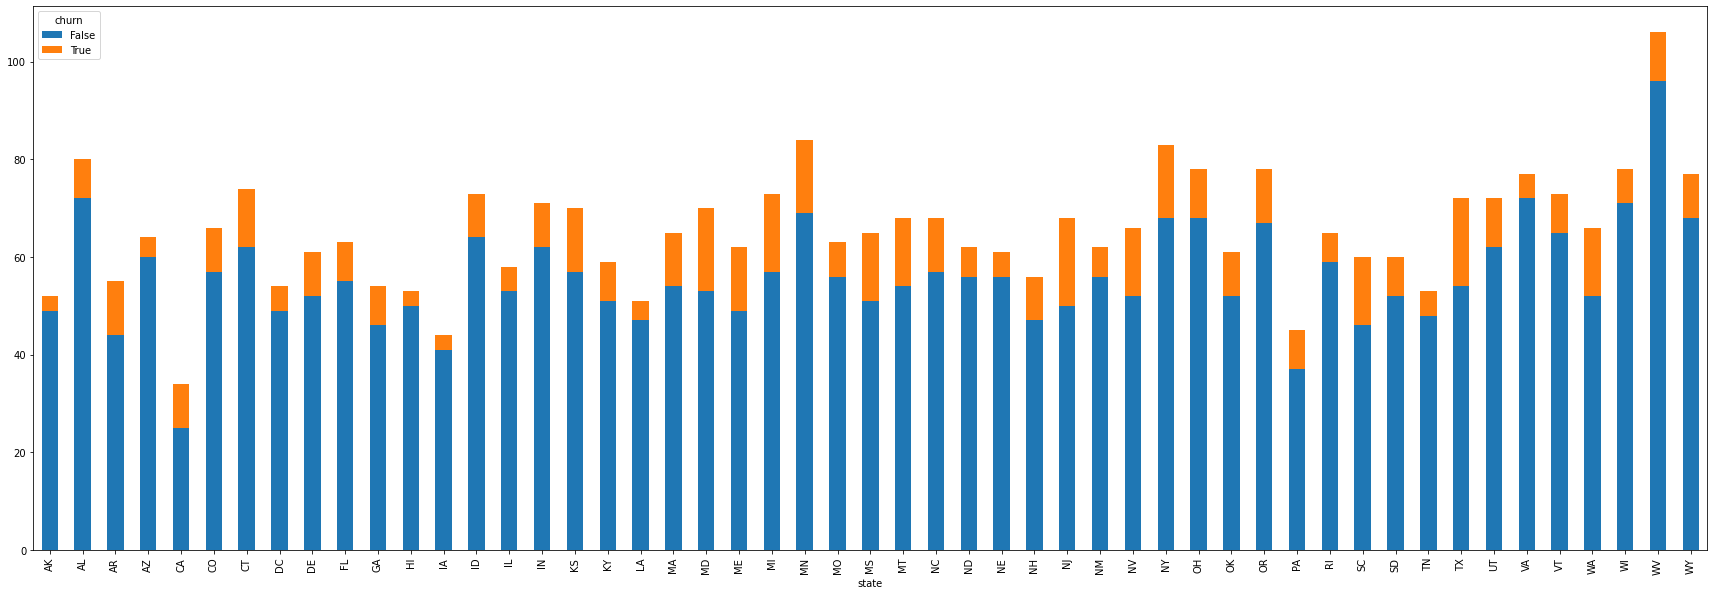

In [5]:
df.groupby(["state", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10)); 

In [6]:
df['area code'].value_counts()

415    1655
510     840
408     838
Name: area code, dtype: int64

Churn rate by area code

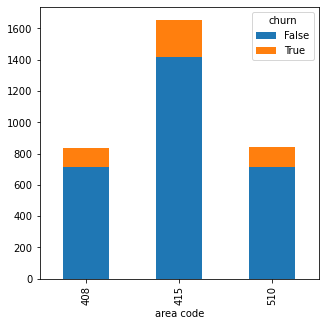

In [7]:
df.groupby(["area code", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5));

churn rate by voice mail plan

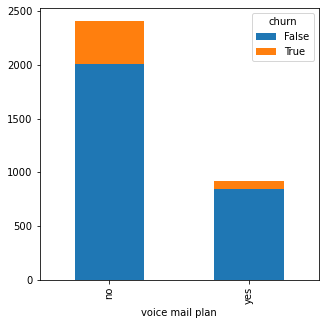

In [8]:
df.groupby(["voice mail plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5));

In [45]:
df_cat = [key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['bool', 'object']]

In [47]:
df_test = df.copy()

In [48]:
le = LabelEncoder()
for i in df_cat:
    le.fit(df_test[i])
    df_test[i] = le.transform(df_test[i])


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   international plan      3333 non-null   object 
 4   voice mail plan         3333 non-null   object 
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   

In [50]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   int32  
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   international plan      3333 non-null   int32  
 4   voice mail plan         3333 non-null   int32  
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   

In [60]:
X2 = df_test.drop('churn', axis=1)
y2 = df_test['churn']

In [61]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=42, test_size=0.33)

In [62]:
rf_test = RandomForestClassifier()
rf_test.fit(X_train2,y_train2)

RandomForestClassifier()

Seeing which feature in the data is most impactful at determining churn rate

[0.02833475 0.02996101 0.00851189 0.08111694 0.01569732 0.03227061
 0.13008574 0.03384371 0.13168373 0.06551008 0.03382758 0.06426317
 0.04032133 0.03321379 0.03660368 0.04225602 0.03900742 0.04442722
 0.10906401]


<AxesSubplot:>

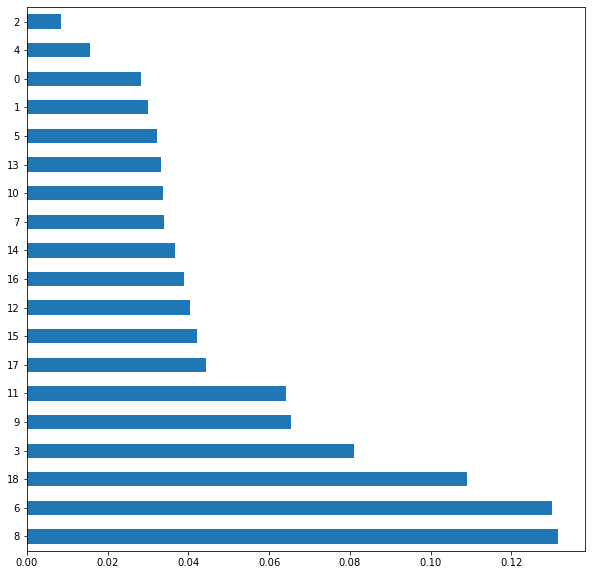

In [67]:
feature_importance = rf_test.feature_importances_
print (rf_test.feature_importances_)
feat_importances = pd.Series(rf_test.feature_importances_)
feat_importances = feat_importances.nlargest(19)
feat_importances.plot(kind='barh' , figsize=(10,10)) 

# Train Test Split

In [9]:
X = df.drop('churn', axis=1)
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.33)

In [10]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 2360 to 3174
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   2233 non-null   object 
 1   account length          2233 non-null   int64  
 2   area code               2233 non-null   int64  
 3   international plan      2233 non-null   object 
 4   voice mail plan         2233 non-null   object 
 5   number vmail messages   2233 non-null   int64  
 6   total day minutes       2233 non-null   float64
 7   total day calls         2233 non-null   int64  
 8   total day charge        2233 non-null   float64
 9   total eve minutes       2233 non-null   float64
 10  total eve calls         2233 non-null   int64  
 11  total eve charge        2233 non-null   float64
 12  total night minutes     2233 non-null   float64
 13  total night calls       2233 non-null   int64  
 14  total night charge      2233 non-null

In [11]:
X_train['voice mail plan'].value_counts()

no     1621
yes     612
Name: voice mail plan, dtype: int64

In [12]:
# Define datatype of columns
num_cols = [1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
cat_cols = [0, 3, 4]

# IMBLearn Pipeline for SMOTE

In [13]:
from imblearn.over_sampling import SMOTENC

In [14]:
sm = SMOTENC(cat_cols, sampling_strategy='auto', random_state=42)

In [15]:
#X_clean_resmp, y_clean_resmp = sm.fit_resample(X_train, y_train)

In [16]:
#y_clean_resmp.value_counts()

In [17]:
# Define functions to identify and select columns based on the datatype stored in that column.
def get_numeric(df):
    return df.select_dtypes(include=['float', 'int'])

def get_categorical(df):
    return df.select_dtypes(include=['bool', 'object'])

# Create transformer objects using our get functions
GetNumeric = FunctionTransformer(get_numeric)
GetCategories = FunctionTransformer(get_categorical)

In [18]:
# Subpipelines to select and scale our numeric data / select and one-hot encode our categorical data.
subpipe_num = Pipeline(steps=[('num', GetNumeric),
                        ('ss', StandardScaler())])
 
subpipe_ohe = Pipeline(steps=[('cat', GetCategories), 
                              ('ohe', OneHotEncoder(sparse=False))])

In [19]:
# Create lists of numeric and categorical columns.
num_cols = [1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
cat_cols = [0, 3, 4]

# Create ColumnTransformer object that contains our subpipes for column transformation
CT = ColumnTransformer(transformers=[
                                    ('subpipe_num', subpipe_num, num_cols),
                                    ('subpipe_ohe', subpipe_ohe, cat_cols)]
                      )

In [20]:
# Template, any model can be appended to the end.
template_model_pipe = ImPipeline(steps=[
                                        ('ct', CT),
                                        ('sm', sm),
                                        ('dc', DummyClassifier(strategy='most_frequent', random_state=42))
                                       ]
                                )

In [21]:
template_model_pipe.fit(X_train, y_train)
template_model_pipe.score(X_train, y_train)

0.8553515450067174

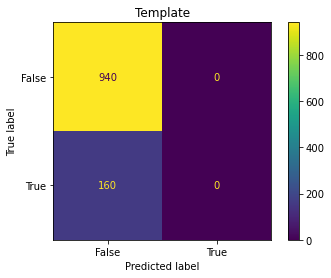

In [22]:
plot_confusion_matrix(template_model_pipe, X_test, y_test)
title = 'Template'
plt.title(title);

# DecisionTree

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
dt_pipeline = ImPipeline(steps=[
                                        ('ct', CT),
                                        ('sm', sm),
                                        ('dt', DecisionTreeClassifier(random_state=42))
                                       ]
                                )

In [25]:
dt_pipeline.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num',
                                                                   FunctionTransformer(func=<function get_numeric at 0x0000014F0C7C55E0>)),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  [1, 2, 5, 6, 7, 8, 9, 10, 11,
                                                   12, 13, 14, 15, 16, 17,
                                                   18]),
                                                 ('subpipe_ohe',
                                                  Pipeline(steps=[('cat',
                                                                   FunctionTransformer(func=<function get_categorical at 0x0000014F0C7C54C0>)),
                                          

In [26]:
dt_y_hat = dt_pipeline.predict(X_test)
print(classification_report(y_test, dt_y_hat))

              precision    recall  f1-score   support

       False       0.92      0.88      0.90       940
        True       0.44      0.57      0.50       160

    accuracy                           0.83      1100
   macro avg       0.68      0.72      0.70      1100
weighted avg       0.85      0.83      0.84      1100



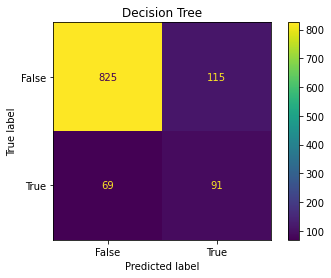

In [27]:
plot_confusion_matrix(dt_pipeline, X_test, y_test)
title = 'Decision Tree'
plt.title(title);

# KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
knn_pipeline = ImPipeline(steps=[
                                        ('ct', CT),
                                        ('sm', sm),
                                        ('knn', KNeighborsClassifier())
                                       ]
                                )

In [30]:
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num',
                                                                   FunctionTransformer(func=<function get_numeric at 0x0000014F0C7C55E0>)),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  [1, 2, 5, 6, 7, 8, 9, 10, 11,
                                                   12, 13, 14, 15, 16, 17,
                                                   18]),
                                                 ('subpipe_ohe',
                                                  Pipeline(steps=[('cat',
                                                                   FunctionTransformer(func=<function get_categorical at 0x0000014F0C7C54C0>)),
                                          

In [31]:
knn_y_hat = knn_pipeline.predict(X_test)
print(classification_report(y_test, knn_y_hat))

              precision    recall  f1-score   support

       False       0.92      0.79      0.85       940
        True       0.34      0.62      0.44       160

    accuracy                           0.77      1100
   macro avg       0.63      0.71      0.64      1100
weighted avg       0.84      0.77      0.79      1100



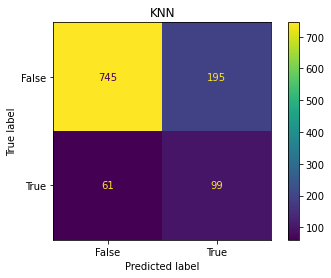

In [32]:
plot_confusion_matrix(knn_pipeline, X_test, y_test)
title = 'KNN'
plt.title(title);

# Logistic Regression

In [33]:
lr_pipeline = ImPipeline(steps=[
                                        ('ct', CT),
                                        ('sm', sm),
                                        ('lr', LogisticRegression(random_state=42))
                                       ]
                                )

In [34]:
lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num',
                                                                   FunctionTransformer(func=<function get_numeric at 0x0000014F0C7C55E0>)),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  [1, 2, 5, 6, 7, 8, 9, 10, 11,
                                                   12, 13, 14, 15, 16, 17,
                                                   18]),
                                                 ('subpipe_ohe',
                                                  Pipeline(steps=[('cat',
                                                                   FunctionTransformer(func=<function get_categorical at 0x0000014F0C7C54C0>)),
                                          

In [35]:
lr_y_hat = lr_pipeline.predict(X_test)
print(classification_report(y_test, lr_y_hat))

              precision    recall  f1-score   support

       False       0.92      0.72      0.81       940
        True       0.28      0.64      0.39       160

    accuracy                           0.71      1100
   macro avg       0.60      0.68      0.60      1100
weighted avg       0.83      0.71      0.75      1100



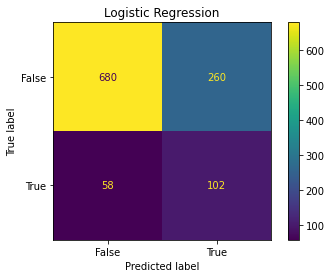

In [36]:
plot_confusion_matrix(lr_pipeline, X_test, y_test)
title = 'Logistic Regression'
plt.title(title);

# Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rf_pipeline = ImPipeline(steps=[
                                        ('ct', CT),
                                        ('sm', sm),
                                        ('rf', RandomForestClassifier(random_state=42))
                                       ]
                                )

In [39]:
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num',
                                                                   FunctionTransformer(func=<function get_numeric at 0x0000014F0C7C55E0>)),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  [1, 2, 5, 6, 7, 8, 9, 10, 11,
                                                   12, 13, 14, 15, 16, 17,
                                                   18]),
                                                 ('subpipe_ohe',
                                                  Pipeline(steps=[('cat',
                                                                   FunctionTransformer(func=<function get_categorical at 0x0000014F0C7C54C0>)),
                                          

In [40]:
rf_y_hat = rf_pipeline.predict(X_test)
print(classification_report(y_test, rf_y_hat))

              precision    recall  f1-score   support

       False       0.93      0.96      0.94       940
        True       0.69      0.58      0.63       160

    accuracy                           0.90      1100
   macro avg       0.81      0.77      0.79      1100
weighted avg       0.90      0.90      0.90      1100



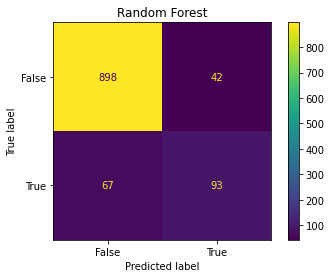

In [41]:
plot_confusion_matrix(rf_pipeline, X_test, y_test)
title = 'Random Forest'
plt.title(title);

# Cleaning Pipeline

In [42]:
# Define functions to identify and select columns based on the datatype stored in that column.
def get_numeric(df):
    return df.select_dtypes(include=['float', 'int'])

def get_categorical(df):
    return df.select_dtypes(include=['bool', 'object'])

# Create transformer objects using our get functions
GetNumeric = FunctionTransformer(get_numeric)
GetCategories = FunctionTransformer(get_categorical)

In [43]:
# Subpipelines to select and scale our numeric data / select and one-hot encode our categorical data.
subpipe_num = Pipeline(steps=[('num', GetNumeric),
                        ('ss', StandardScaler())])
 
subpipe_ohe = Pipeline(steps=[('cat', GetCategories), 
                              ('ohe', OneHotEncoder(sparse=False))])


In [44]:
# Create lists of numeric and categorical columns.
num_cols = [1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
cat_cols = [0, 3, 4]

# Create ColumnTransformer object that contains our subpipes for column transformation
CT = ColumnTransformer(transformers=[
                                    ('subpipe_num', subpipe_num, num_cols),
                                    ('subpipe_ohe', subpipe_ohe, cat_cols)]
                      )